<h1 style="text-align:center">HYBRID MOVIE RECOMMENDER SYSTEM</h1>
<h3 style="text-align:center">CONTENT-BOOSTED COLLABORATIVE FILTERING BASED RECOMMENDER SYSTEM</h3>

<p>A <b>Recommender System</b>, or a <b>Recommendation System</b>, is a subclass of information filtering system that seeks to predict the "rating" or "preference" a user would give to an item</p>
<p>It is primarily classified into 2 types,</p>

<ol>
    <li>Collaborative Filtering
    <li>Content-based Filtering
</ol>

<h4> 1. Collaborative Filtering </h4>
<p> Collaborative filtering is based on the assumption that people who agreed in the past will agree in the future, and that they will like similar kinds of items as they liked in the past. The system generates recommendations using only information about rating profiles for different users or items. By locating peer users/items with a rating history similar to the current user or item, they generate recommendations using this neighborhood. </p>

<h5><u>Advantages:</u></h5>
<ul>
    <li>Does not require machine analysable content.</li>
    <li>Data can be both implicit and explicit.</li>
</ul>

<h5><u>Disadvantages:</u></h5>
<ul>
    <li>Cold Start.</li>
    <li>Scalability.</li>
    <li>Sparsity.</li>
</ul>

<h4>2. Content-based Filtering</h4>
<p>Content-based filtering methods are based on a description of the item and a profile of the user's preferences. These methods are best suited to situations where there is known data on an item (name, location, description, etc.), but not on the user. Content-based recommenders treat recommendation as a user-specific classification problem and learn a classifier for the user's likes and dislikes based on an item's features.

In this system, keywords are used to describe the items and a user profile is built to indicate the type of item this user likes. In other words, these algorithms try to recommend items that are similar to those that a user liked in the past, or is examining in the present. It does not rely on a user sign-in mechanism to generate this often temporary profile. In particular, various candidate items are compared with items previously rated by the user and the best-matching items are recommended.</p>

<h5><u>Advantages:</u></h5>
<ul>
    <li>User preference-based.</li>
    <li>Can also include sentiment analysis.</li>
</ul>

<h5><u>Disadvantages:</u></h5>
<ul>
    <li>Monotonous recommendations - no variation.</li>
</ul>

Most recommender systems now use a <b>hybrid approach</b>, combining collaborative filtering, content-based filtering, and other approaches . There is no reason why several different techniques of the same type could not be hybridized. Hybrid approaches can be implemented in several ways: by making content-based and collaborative-based predictions separately and then combining them; by adding content-based capabilities to a collaborative-based approach (and vice versa); or by unifying the approaches into one model. Several studies that empirically compare the performance of the hybrid with the pure collaborative and content-based methods and demonstrated that the hybrid methods can provide more accurate recommendations than pure approaches. These methods can also be used to overcome some of the common problems in recommender systems such as cold start, etc.

In this project, we have constructed a <b><i>Content-boosted Collaborative Filtering Recommender System</i></b>.

In [1]:
import pandas as pd

First, we start by importing the datasets.

The 'movie_data.csv' is mined from the internet using a simple web-crawler and references from 'MovieLens'. The MovieLens dataset can be found in https://grouplens.org/datasets/movielens/latest/

In [2]:
MOVIES = pd.read_csv('movie_data.csv',
                     usecols= ['movieId', 'imdbID', 'Title', 'Year', 'Genre', 'Director', 'Writer', 'Actors', 'Language',
                              'Poster'],
                     dtype= {'movieId': 'int64', 'imdbID': 'str', 'Title': 'str', 'Year': 'str', 'Genre': 'str', 
                             'Director': 'str', 'Writer': 'str', 'Actors': 'str', 'Language': 'str', 'Poster': 'str'})
MOVIES.head()

,movieId,imdbID,Title,Year,Genre,Director,Writer,Actors,Language,Poster
0,1,tt0114709,Toy Story,1995,"Animation, Adventure, Comedy, Family, Fantasy",John Lasseter,"John Lasseter (original story by), Pete Docter...","Tom Hanks, Tim Allen, Don Rickles, Jim Varney",English,https://m.media-amazon.com/images/M/MV5BMDU2ZW...
1,2,tt0113497,Jumanji,1995,"Adventure, Comedy, Family, Fantasy",Joe Johnston,"Jonathan Hensleigh (screenplay by), Greg Taylo...","Robin Williams, Jonathan Hyde, Kirsten Dunst, ...","English, French",https://m.media-amazon.com/images/M/MV5BZTk2Zm...
2,3,tt0113228,Grumpier Old Men,1995,"Comedy, Romance",Howard Deutch,"Mark Steven Johnson (characters), Mark Steven ...","Walter Matthau, Jack Lemmon, Sophia Loren, Ann...","English, Italian, German",https://m.media-amazon.com/images/M/MV5BMjQxM2...
3,4,tt0114885,Waiting to Exhale,1995,"Comedy, Drama, Romance",Forest Whitaker,"Terry McMillan (novel), Terry McMillan (screen...","Whitney Houston, Angela Bassett, Loretta Devin...",English,https://m.media-amazon.com/images/M/MV5BYzcyMD...
4,5,tt0113041,Father of the Bride Part II,1995,"Comedy, Family, Romance",Charles Shyer,"Albert Hackett (screenplay ""Father's Little Di...","Steve Martin, Diane Keaton, Martin Short, Kimb...",English,https://m.media-amazon.com/images/M/MV5BOTEyNz...


It can be seen that the DataFrame has the following columns:
<b>
1. movieId (int)
2. imdbID (str)
3. Title (str)
4. Year (str)
5. Genre (List)
6. Director (str)
7. Writer (List)
8. Actors (List)
9. Language (List)
10. Poster (str)
</b>

But, since all the multi-valued attributes are stored as comma-separated strings, the data has to be processed.

In [3]:
MOVIES = MOVIES.fillna('')

MOVIES['Genre'] = MOVIES['Genre'].str.split(', ')
MOVIES['Actors'] = MOVIES['Actors'].str.split(', ')
MOVIES['Writer'] = MOVIES['Writer'].replace(r' \([^\)]*\)', '', regex= True).str.split(', ')
MOVIES['Language'] = MOVIES['Language'].str.split(', ')

MOVIES.head()

,movieId,imdbID,Title,Year,Genre,Director,Writer,Actors,Language,Poster
0,1,tt0114709,Toy Story,1995,"[Animation, Adventure, Comedy, Family, Fantasy]",John Lasseter,"[John Lasseter, Pete Docter, Andrew Stanton, J...","[Tom Hanks, Tim Allen, Don Rickles, Jim Varney]",[English],https://m.media-amazon.com/images/M/MV5BMDU2ZW...
1,2,tt0113497,Jumanji,1995,"[Adventure, Comedy, Family, Fantasy]",Joe Johnston,"[Jonathan Hensleigh, Greg Taylor, Jim Strain, ...","[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[English, French]",https://m.media-amazon.com/images/M/MV5BZTk2Zm...
2,3,tt0113228,Grumpier Old Men,1995,"[Comedy, Romance]",Howard Deutch,"[Mark Steven Johnson, Mark Steven Johnson]","[Walter Matthau, Jack Lemmon, Sophia Loren, An...","[English, Italian, German]",https://m.media-amazon.com/images/M/MV5BMjQxM2...
3,4,tt0114885,Waiting to Exhale,1995,"[Comedy, Drama, Romance]",Forest Whitaker,"[Terry McMillan, Terry McMillan, Ronald Bass]","[Whitney Houston, Angela Bassett, Loretta Devi...",[English],https://m.media-amazon.com/images/M/MV5BYzcyMD...
4,5,tt0113041,Father of the Bride Part II,1995,"[Comedy, Family, Romance]",Charles Shyer,"[Albert Hackett, Frances Goodrich, Nancy Meyer...","[Steve Martin, Diane Keaton, Martin Short, Kim...",[English],https://m.media-amazon.com/images/M/MV5BOTEyNz...


Now, the cleaned data has 9719 rows and 9 columns

In [4]:
MOVIES.shape

(9719, 10)

Next, the ratings data is imported from 'ratings.csv'. This dataset is a part of the MovieLens dataset, which is available in https://grouplens.org/datasets/movielens/latest/

In [5]:
RATINGS = pd.read_csv('ratings.csv', usecols= ['userId', 'movieId', 'rating'])
RATINGS.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [6]:
RATINGS.groupby('movieId').count()

,userId,rating
movieId,,
1,215,215
2,110,110
3,52,52
4,7,7
5,49,49
...,...,...
193581,1,1
193583,1,1
193585,1,1


## Methods and Setup for Content-Boosting

Correlation between movie data, for example: Director, Actors, Genre, etc. is calculated using a simple metric like cosine similarity, etc. Using this, similar movies can be grouped together.

For this, a 'soup' is created: a collection of all metadata.

In [7]:
def create_soup(row):
    return ' '.join([row['Title'], row['Year'], ' '.join(row['Genre']), row['Director'], ' '.join(row['Writer']), 
                     ' '.join(row['Actors']), ' '.join(row['Language'])])

MOVIES['soup'] = MOVIES.apply(create_soup, axis= 1)
MOVIES['soup'].head()

0    Toy Story 1995 Animation Adventure Comedy Fami...
1    Jumanji 1995 Adventure Comedy Family Fantasy J...
2    Grumpier Old Men 1995 Comedy Romance Howard De...
3    Waiting to Exhale 1995 Comedy Drama Romance Fo...
4    Father of the Bride Part II 1995 Comedy Family...
Name: soup, dtype: object

We use 'CountVectorizer' from sklearn.metrics.pairwise module, that vectorizes words for comparison. We will also import the cosine similarity module, which computes the similarity of a particular row with other rows of the dataset.

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
vectorized_matrix = cv.fit_transform(MOVIES['soup'])
vectorized_matrix.shape

(9719, 28605)

In [9]:
from sklearn.metrics.pairwise import cosine_similarity

def create_cosine_sim_matrix(movie_ind):
    return cosine_similarity(vectorized_matrix, vectorized_matrix[movie_ind])

## Methods and Setup for Collaborative Filtering Process

Plots between columns 'movieId', 'userId' and 'rating' can be visualized below. Though the first 2 graphs do not give any significant relation, the third graph shows dense clustering, receding with increasing 'movieId'. Thus, a relation between 'movieId' and 'userId' is more meaningful in this case. However, the 'rating' is also a hidden factor in this dependance.

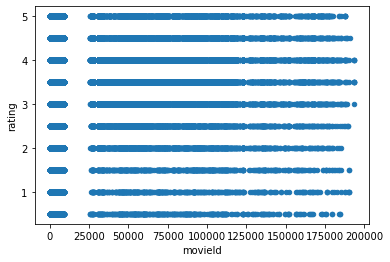

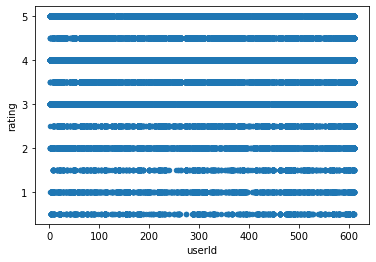

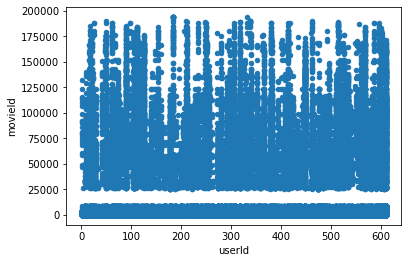

In [10]:
RATINGS.plot.scatter(x= 'movieId', y= 'rating') 
RATINGS.plot.scatter(x= 'userId', y= 'rating') 
RATINGS.plot.scatter(x= 'userId', y= 'movieId')

<h3>Compressed Sparse Row (CSR) Matrix</h3>

We converted the tabular 'ratings' data into 2-D correlation data, using the 'pivot' function of the pandas.DataFrame with the index as 'movieId' column, columns as 'userId' column and the values as the 'rating' column. Then we convert it into a compressed sparse row matrix for easier storage (null value storage is handled better in sparse matrices). We use the <b>csr_matrix</b> function from the scipy.sparse module.

In [11]:
# Few helper functions
from fuzzywuzzy import fuzz

def find_closest_movie(movie_name: str) -> int:
    movie_name = movie_name.lower()
    closest_matches = MOVIES[['Title', 'Year']].copy()
    closest_matches['Ratio'] = closest_matches.apply(lambda row: fuzz.ratio(row['Title'].lower(), movie_name), axis= 1)
    
    closest_movie =  closest_matches[closest_matches['Ratio'] >= 60]
    
    if len(closest_movie):
        return closest_movie.sort_values(by= ['Ratio', 'Year'], ascending= False)['Ratio'].idxmax()
    return None

MOVIES.loc[find_closest_movie('irn man')].Title

'Iron Man'

In [12]:
from scipy.sparse import csr_matrix

def create_sparse_matrix(ratings):
    csr_ratings = csr_matrix(ratings.pivot(index= 'movieId', columns= 'userId', values= 'rating').fillna(0).values)
    return csr_ratings

We'll be using 2 different models for filtering predictions (Similarity and Ratings estimation) using <b>K-Nearest Neighbors (KNN)</b> and <b>Support Vector Decomposition (SVD)</b> respectively, as part of cluster analysis.

<h4>K-NEAREST NEIGHBORS</h4>

Clusters nearest to a given sample are analysed and k-nearest samples are returned. This is a function at run-time because it is dependant on the data filtered as a result of content boosting.

In [13]:
from sklearn.neighbors import NearestNeighbors

def knn_model(ratings, movie_ind):
    KNN = NearestNeighbors(n_neighbors= 10, algorithm= 'brute', metric= 'cosine', n_jobs= -1)
    csr = create_sparse_matrix(ratings)
    KNN.fit(csr)
    
    return KNN.kneighbors(csr[movie_ind], n_neighbors= 21, return_distance= False).squeeze().tolist()[1:]

<h4>SUPPORT VECTOR DECOMPOSITION</h4>

Approximates values by multiplying 2 lower rank matrices. Here, we can predict the user's rating based on the trend of ratings.
This generates 9701 x 610 values for user ratings predictions, so the initial run-time is high, but is a one-time run.

In [14]:
from surprise import SVD, Reader, Dataset
from surprise.model_selection import cross_validate
    
reader = Reader()
data = Dataset.load_from_df(RATINGS, reader)
    
svd = SVD()
cross_validate(svd, data, measures= ['RMSE', 'MAE'])

trainset = data.build_full_trainset()
svd.fit(trainset)

## Hybrid Recommender System Model

The idea is to pass the movies into Content-based filtering first and filter out top 30 movies, that are closest to the input movie. Then these movies are further subjected to the Collaborative Filtering models, wherein they are reduced to 20 by KNN and finally, to 10 by the SVD algorithm.

In [18]:
import heapq

def generate_recommendations(movie_ind: int, userId: int):
    # Content boosting - selects 30 closest movies + 1 (input movie)
    sim_matrix = create_cosine_sim_matrix(movie_ind)
    content_boost = heapq.nlargest(31, range(len(sim_matrix)), sim_matrix.__getitem__)
    
    # Collaborative Filtering
    # KNN model selects top 20 closest movies
    knn_result = knn_model(RATINGS[RATINGS['movieId'].isin(MOVIES.loc[content_boost].movieId)], 0)
    
    # SVD model predicts user ratings for these movies and selects the top 10
    knn_result_movies = MOVIES.loc[content_boost].iloc[knn_result]
    
    return knn_result_movies.loc[knn_result_movies.apply(lambda row: svd.predict(userId, row['movieId']).est, axis= 1).sort_values(ascending= False).head(10).index].Title.tolist()

# The Driver Code

This is the main interface of the program, that recieves a movie name and a user ID (between 1 and 610) and gives 10 recomendations for the movie entered

In [35]:
movie_name = input("Enter the name of the movie: ")
userId = int(input("Enter your user ID: "))

closest_movie_ind = find_closest_movie(movie_name)

if closest_movie_ind is None:
    print("\nOops! No matching movies found!")
else:
    closest_movie_name = MOVIES.loc[closest_movie_ind].Title
    if not closest_movie_name == movie_name: 
        print(f"\nDid you mean '{closest_movie_name}'?")

    print("\nRecommendations: \n")

    for pos, movie in enumerate(generate_recommendations(closest_movie_ind, userId)):
        print(f'{pos + 1}. {movie}')

Enter the name of the movie: pirates of the caribean
Enter your user ID: 45

Did you mean 'Pirates of the Caribbean: At World's End'?

Recommendations: 

1. Pirates of the Caribbean: The Curse of the Black Pearl
2. Time Bandits
3. Aladdin
4. The Imaginarium of Doctor Parnassus
5. Fear and Loathing in Las Vegas
6. The Adventures of Baron Munchausen
7. The Mask of Zorro
8. Rango
9. Pirates of the Caribbean: Dead Man's Chest
10. The Meaning of Life
